## Introdução

Olá Cientista de Dados! 

Nas aulas anteriores aprendemos a criar gráficos que nos permitem realizar comparações entre categorias de uma dimensão, e também observar as variações de uma categoria ao longo de uma dimensão contínua (podendo ser uma dimensão numérica ou a mais popular, o tempo). Outra característica que esses gráficos possuem é que eles demonstram valores agregados no nível das categorias que estão sendo comparadas.

Nesta aula, iremos explorar gráficos que nos permitirão:
- analisar a distribuição dos valores ao longo de variáveis contínuas de forma individualizada
- analisar a correlação entre variáveis
- identificar o que chamamos de outliers, que são os pontos que fogem da distribuição observada (aquele ponto fora da curva).

Para realizar esse tipo de análise, vamos trabalhar com os Gráficos de Dispersão e Pontos.

## Preparação

Vamos carregar nossa bibliotecas e os dados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemons = pd.read_csv('pokemons.csv')

## Utilização Básica

Como mencionamos anteriormente, uma das características dos gráficos de dispersão e pontos é que normalmente queremos que cada linha do nosso conjunto de dados esteja representado, com seus valores individualizados, ao contrário dos gráficos de barras, onde as informações estão agregadas através de cálculos de média, soma, ...

Outra notada diferença é que neste tipo de gráfico, os eixos não utilizam categorias discretas. O que vemos é representação do domínio contínuo de variáveis, e os pontos correspondem a uma ocorrência.

Trazendo para a realidade do nosso conjunto de dados: os gráficos de dispersão não terão em seus eixos valores como Tipo ou Geração - o que iremos colocar nos eixos serão Ataque e Defesa, e os pontos plotados no gráfico representarão cada um dos pokemons no nosso conjunto de dados.

Para fazer isso, utilizaremos a função `scatterplot()` do seaborn.


Vamos ver na prática?

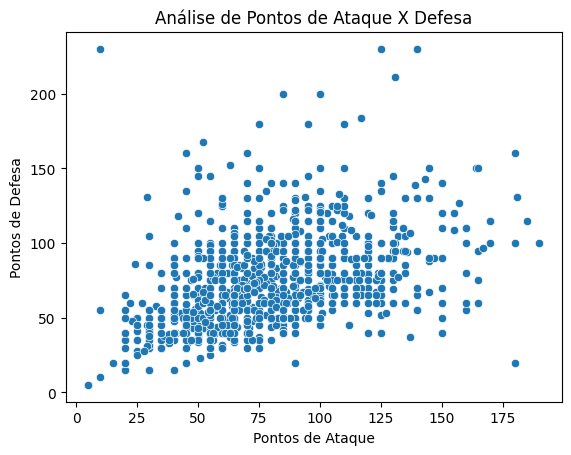

In [3]:
sns.scatterplot(pokemons, x='Att', y='Def')
plt.title('Análise de Pontos de Ataque X Defesa')
plt.xlabel('Pontos de Ataque')
plt.ylabel('Pontos de Defesa')
plt.show()

É bem simples, não é mesmo? Escolhemos a variável do eixo X e a variável do eixo Y e é isso, vemos cada um dos nossos pokemons plotados no gráfico.

Esse tipo de gráfico serve para mostrarmos a relação que existe entre as duas variáveis. No gráfico acima, podemos perceber que existe uma maior concentração de pokemons na faixa de 50-100 pontos de ataque e defesa. Também percebemos outras informações, tais como:
- pelo menos 1 pokemon tem um alto valor de pontos de defesa, mas quase nada de pontos de ataque
- pelo menos 1 pokemon tem um alto valor de pontos de ataque, mas quase nada de pontos de defesa.

Isso são o que chamamos de outliers, pois fogem da distribuição que percebemos como padrão.

Mas podemos melhorar um pouco nosso gráfico. Por exemplo, podemos colorir nossos pontos de acordo com a geração, assim podemos entender qual é a distribuição de cada geração.

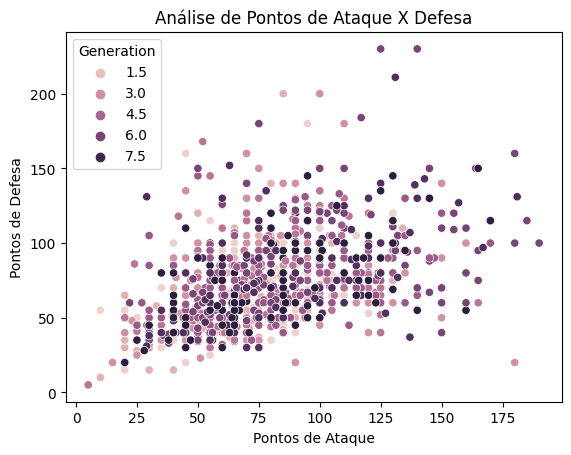

In [10]:
sns.scatterplot(pokemons, x='Att', y='Def', hue='Generation')
plt.title('Análise de Pontos de Ataque X Defesa')
plt.xlabel('Pontos de Ataque')
plt.ylabel('Pontos de Defesa')
plt.show()

Melhorou um pouco, agora temos noção das gerações, mas a distribuição náo é uniforme, pois como o valor é numérico ele criou faixas de valores. Se quisermos ver cada geração individualmente, teremos que trabalhar nossos dados.

### Adicionando uma coluna em nossos dados

Adicionar uma nova coluna em um DataFrame pandas é bem simples:
```python
pokemons['Generation Desc'] = ""
```

Isso criará uma nova coluna chamada 'Generation Desc' que terá cada linha populada com o valor "" (vazio). Isso é um bom início, mas precisamos atribuir um valor a esta coluna, preferencialmente baseado no valor do campo 'Generation' original. Para isso, iremos utilizar a função `apply()` do DataFrame. Vamos ao comando.

In [14]:
pokemons['Generation Desc'] = pokemons['Generation'].apply(lambda gen: 'Gen ' + str(int(gen)))

A função `apply()` nos permite aplicar uma função (aqui utilizamos uma função lambda) que transforma o valor do campo Generation em um valor inteiro sem casas decimais para depois transforma-lo em texto, de forma que consigamos juntar com a string 'Gen'. Assim, temos uma descrição textual da geração. Com isso, podemos agora, tentar novamente o plot do gráfico.

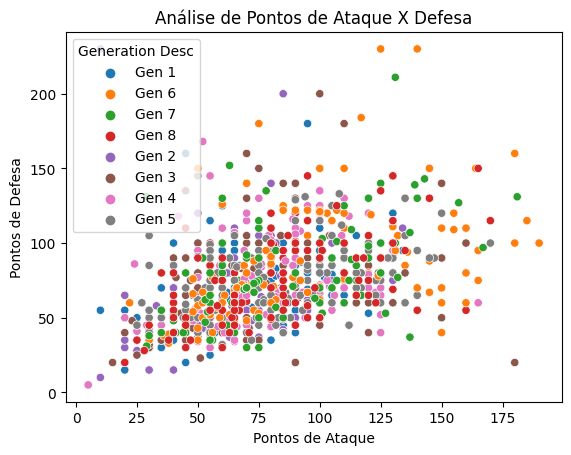

In [15]:
sns.scatterplot(pokemons, x='Att', y='Def', hue='Generation Desc')
plt.title('Análise de Pontos de Ataque X Defesa')
plt.xlabel('Pontos de Ataque')
plt.ylabel('Pontos de Defesa')
plt.show()

As cores ficaram bem melhores, mas a posição da legenda ficou bem ruim. Vamos arrumar?

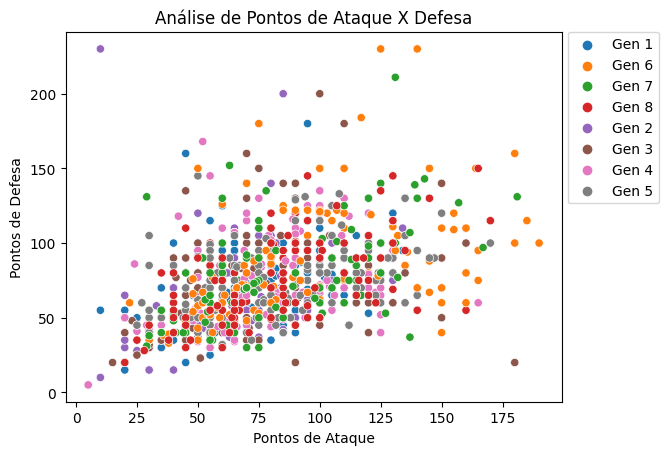

In [26]:
sns.scatterplot(pokemons, x='Att', y='Def', hue='Generation Desc')
plt.title('Análise de Pontos de Ataque X Defesa')
plt.xlabel('Pontos de Ataque')
plt.ylabel('Pontos de Defesa')
plt.legend(loc='upper right', bbox_to_anchor=(1.21,1.02))
plt.show()

Agora temos nosso gráfico de dispersão pronto. Na próxima seção, vamos discutir um caso específico de gráfico de dispersão, chamado de Gráfico de Quadrantes.

### Gráfico de Quadrantes

O gráfico de quadrantes é um caso específico de um gráfico de dispersão, onde dividimos a área do gráfico em quadrantes - superior esquerdo, superior direito, inferior esquerdo e inferior direito - e a presença de um ponto nesses quadrantes tem um significado especial. O maior exemplo deste tipo de gráfico é o "Quadrante Mágico" do Grupo Gartner, que publica todos os anos neste formato quais as empresas ou produtos que se posicionam como líderes do mercado em cada setor. Veja o exemplo abaixo, que representa O Quadrante Mágico de 2022 para a área de Business Intelligence.

![Quadrante Mágico 2022 - BI](gmq-2022-bi.png)

Neste formato do Gartner, os pontos que estiverem no quadrante superior direito são considerados os líderes do mercado, levando em conta as variáveis completude da visão e capacidade de execução, que são dois scores calculados e ficam em uma escala de 1 a 10 pontos.

Então, levando em consideração que o nosso gráfico de dispersão utiliza os atributos de Ataque e Defesa, vamos imaginar como transformar esse gráfico em um 'Quadrante Mágico' que nos permitirá saber quais são os pokemons mais capazes e que possuem a melhor relação entre pontos de ataque e defesa.

As mudanças que iremos aplicar no nosso gráfico original de dispersão são:
- deixar os eixos com a mesma faixa de valores. Agora eles estão levemente desencontrados
- plotar os eixos que dividem os quadrantes
- plotar um texto descritivo para cada quadrante
- se possível, poder nomear cada ponto no gráfico, com o nome do pokemon.

Acompanhe os comentários no código para entender o que foi feito!

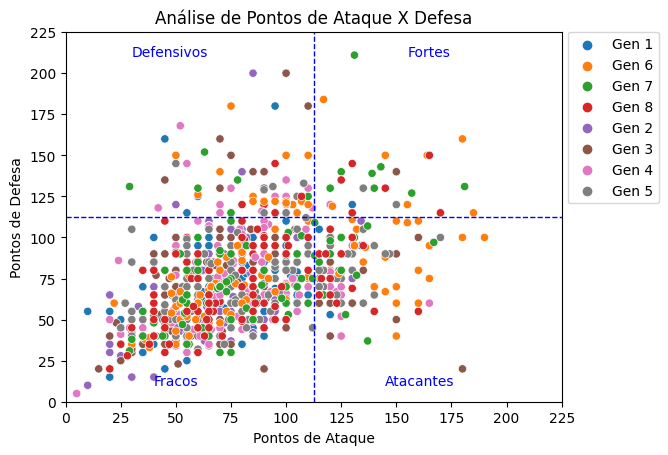

In [62]:
# gera o gráfico original
sns.scatterplot(pokemons, x='Att', y='Def', hue='Generation Desc')

# adiciona os títulos
plt.title('Análise de Pontos de Ataque X Defesa')
plt.xlabel('Pontos de Ataque')
plt.ylabel('Pontos de Defesa')

# adiciona e posiciona a legenda
plt.legend(loc='upper right', bbox_to_anchor=(1.21,1.02))

# ajusta a faixa de valores para os dois eixos
# observe que utilizamos valores fixos. O ideal seria utilizar alguma
# fórmula ou função para dinamizar, mas vamos deixar simples
plt.xlim(0, 225)
plt.ylim(0, 225)

# traçamos as linhas de divisão dos quadrantes
# observe que a posição delas é na exata metade do 
# valor máximo de cada eixo
plt.axhline(y=112.5, color='blue', linestyle='--', linewidth=1)           
plt.axvline(x=112.5, color='blue',linestyle='--', linewidth=1) 

# criamos o label que identifica cada quadrante e o seu significado
plt.text(x=40, y=10, s="Fracos", color='blue')
plt.text(x=145, y=10, s="Atacantes", color='blue')
plt.text(x=155, y=210, s="Fortes", color='blue')
plt.text(x=30, y=210, s="Defensivos", color='blue')

# mostra o gráfico
plt.show()

Ficou bem bonito o nosso quadrante! A única coisa que não fizemos foi adicionar um "tooltip" a cada ponto para sabermos que pokemon é aquele. Para isso, precisamos que o gráfico seja do tipo interativo, o que requer utilizar outra biblioteca. Em uma das próximas aulas iremos explorar uma biblioteca que permite esse tipo de interação.

## Conclusão

Nesta aula exercitamos ainda mais nossa capacidade de criar gráficos, expandido nosso conhecimento para a aplicação de mais uma função, chamada `scatterplot()` que nos permite criar gráficos de dispersão e os populares quadrantes mágicos. Também aprendemos mais algumas funções que nos ajudam a melhor formatar os nossos gráficos.

Na próxima aula, vamos aprender a criar o mais polêmico dos gráficos: o gráfico de pizza!!!

### Navegação

| [< Anterior](/posts/data-107/index.html) 	| \| | [Próximo >](/posts/data-109/index.html) 	|
|---------- |---|--------:	|